#**Ciência de Dados**
**Tarefa - Análise de Contratos**

**Prof.: Sergio Assuncao Monteiro, DSc**

**Alunos: Gabriel Rios (2014000031) e Gustavo Carvalho (2019100645)**

# **Geração de Dados**

In [1]:
!pip install pandas faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00


**Importar dados**

In [2]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

**Faker para gerar dados fictícios**

In [3]:
fake = Faker('pt_BR')

**Gerar dados dos "contratos"**

In [4]:
quantidade_de_contratos = 100
dados_contrato = []
for _ in range(quantidade_de_contratos):
    numero_contrato = fake.random_int(min=1000, max=9999)
    data_assinatura = fake.date_between(start_date='-5y', end_date='today')
    valor_contrato = round(random.uniform(10000, 50000), 2)
    duracao_contrato = fake.random_int(min=1, max=5)
    cnpj_fornecedor = fake.cnpj()
    nome_fornecedor = fake.company()
    agencia_governamental = fake.company()
    valor_pago = 0
    valor_a_pagar = valor_contrato
    data_pagamento_parcela = [fake.date_between_dates(date_start=data_assinatura, date_end=data_assinatura + timedelta(days=365 * duracao_contrato)) for _ in range(duracao_contrato)]

    # Dados Geográficos (gerados aleatoriamente)
    latitude = round(random.uniform(-90, 90), 6)
    longitude = round(random.uniform(-180, 180), 6)

    # Histórico de Pagamentos (lista de pagamentos)
    historico_pagamentos = []
    for i in range(duracao_contrato):
        valor_parcela = round(random.uniform(0, valor_a_pagar), 2)
        data_pagamento = data_pagamento_parcela[i]
        valor_a_pagar -= valor_parcela
        valor_pago += valor_parcela
        historico_pagamentos.append({'Data Pagamento': data_pagamento, 'Valor': valor_parcela})

    # Adicione os dados à lista
    dados_contrato.append([numero_contrato, data_assinatura, valor_contrato, duracao_contrato, cnpj_fornecedor, nome_fornecedor, agencia_governamental, valor_pago, valor_a_pagar, data_pagamento_parcela, latitude, longitude, historico_pagamentos])

**DataFrame a partir dos dados**

In [5]:
df = pd.DataFrame(dados_contrato, columns=["Número do contrato", "Data de assinatura do contrato", "Valor do contrato",
                                           "Duração do contrato", "CNPJ da empresa ou fornecedor contratado","Nome da empresa ou fornecedor contratado",
                                           "Nome da agência governamental",
                                           "Valor pago até o momento", "Valor a ser pago no futuro",
                                           "Data de pagamento de parcelas", "Latitude", "Longitude", "Histórico de Pagamentos"])


**DataFrame em um arquivo CSV**

In [6]:
df.to_csv('dados_contrato.csv', index=False)
print("Planilha de dados gerada e salva em 'dados_contrato.csv'")

Planilha de dados gerada e salva em 'dados_contrato.csv'


In [7]:
df

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,CNPJ da empresa ou fornecedor contratado,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos
0,9945,2022-10-07,40601.61,3,96.235.184/0001-48,Pereira das Neves Ltda.,Dias,40275.15,326.46,"[2024-10-31, 2024-09-03, 2025-04-27]",-69.724450,8.866102,"[{'Data Pagamento': 2024-10-31, 'Valor': 8616...."
1,5207,2020-03-30,26397.76,2,98.502.137/0001-49,Rocha,da Rocha e Filhos,20436.77,5960.99,"[2020-11-19, 2021-01-06]",-81.814456,144.653424,"[{'Data Pagamento': 2020-11-19, 'Valor': 15183..."
2,5607,2021-03-19,32105.50,5,62.437.159/0001-25,da Cruz,Barbosa S.A.,30113.41,1992.09,"[2021-10-17, 2021-10-14, 2022-05-01, 2023-12-0...",-55.246095,-90.668714,"[{'Data Pagamento': 2021-10-17, 'Valor': 2957...."
3,9302,2019-08-13,35625.82,2,51.468.307/0001-52,Jesus,Gonçalves,32197.37,3428.45,"[2019-11-12, 2019-11-08]",16.205944,68.286743,"[{'Data Pagamento': 2019-11-12, 'Valor': 22157..."
4,5763,2022-04-30,11209.44,3,27.108.349/0001-06,da Rosa S/A,Nogueira,9124.30,2085.14,"[2022-11-01, 2024-12-17, 2025-02-02]",-44.052990,31.162522,"[{'Data Pagamento': 2022-11-01, 'Valor': 6257...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3960,2019-07-03,45901.17,3,36.257.984/0001-38,Rezende Pinto e Filhos,Campos,40053.21,5847.96,"[2021-08-07, 2020-12-23, 2020-10-14]",35.918034,75.034246,"[{'Data Pagamento': 2021-08-07, 'Valor': 2410...."
96,8885,2019-11-02,10067.64,2,71.460.352/0001-78,Ferreira - ME,da Luz e Filhos,4325.50,5742.14,"[2021-08-30, 2020-09-18]",27.647027,99.645499,"[{'Data Pagamento': 2021-08-30, 'Valor': 3441...."
97,4765,2020-07-06,15588.42,3,85.361.497/0001-26,Cunha Rezende S.A.,Costela,15567.84,20.58,"[2021-08-01, 2022-01-23, 2022-11-25]",12.536554,98.120479,"[{'Data Pagamento': 2021-08-01, 'Valor': 1967...."
98,6401,2021-06-03,26628.58,1,26.059.843/0001-57,Melo Barros - EI,Carvalho S/A,16077.82,10550.76,[2022-05-22],-61.033971,-99.969116,"[{'Data Pagamento': 2022-05-22, 'Valor': 16077..."


# **Analisar Contratos**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dados do arquivo CSV**

In [9]:
dados_contrato = pd.read_csv('dados_contrato.csv')

**Exibir as primeiras linhas do DataFrame para verificar os dados**

In [10]:
print(dados_contrato.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                9945                     2022-10-07           40601.61   
1                5207                     2020-03-30           26397.76   
2                5607                     2021-03-19           32105.50   
3                9302                     2019-08-13           35625.82   
4                5763                     2022-04-30           11209.44   

   Duração do contrato CNPJ da empresa ou fornecedor contratado  \
0                    3                       96.235.184/0001-48   
1                    2                       98.502.137/0001-49   
2                    5                       62.437.159/0001-25   
3                    2                       51.468.307/0001-52   
4                    3                       27.108.349/0001-06   

  Nome da empresa ou fornecedor contratado Nome da agência governamental  \
0                  Pereira das Neves Ltda.                          Di



*   **Análise exploratória simples**
*   **Estatísticas descritivas dos valores dos contratos**



In [11]:
estatisticas_contratos = dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']].describe()
print(estatisticas_contratos)

       Valor do contrato  Valor pago até o momento  Valor a ser pago no futuro
count         100.000000                100.000000                  100.000000
mean        29034.349800              22193.083500                 6841.266300
std         10792.624974              11981.186982                 9920.503827
min         10067.640000                134.400000                    0.400000
25%         20103.367500              13642.287500                  494.377500
50%         29066.560000              21000.935000                 2636.160000
75%         37188.700000              30689.142500                 8335.625000
max         49755.140000              49467.790000                46312.960000


# **Exercício**

**Faça uma análise do histórico de pagamentos. Sua análise precisa de recursos gráficos e responder as seguintes perguntas:**



1.   **Quais são os principais fornecedores?**
2.   **Quais regiões receberam mais verbas ?**
3.   **Quanto falta para pagar de cada contrato?**
4.   **Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?**
5.   **Visualização da distribuição da duração dos contratos**
6.   **Fazer uma análise com regressão linear sobre verbas**



## 1 - Quais são os principais fornecedores?

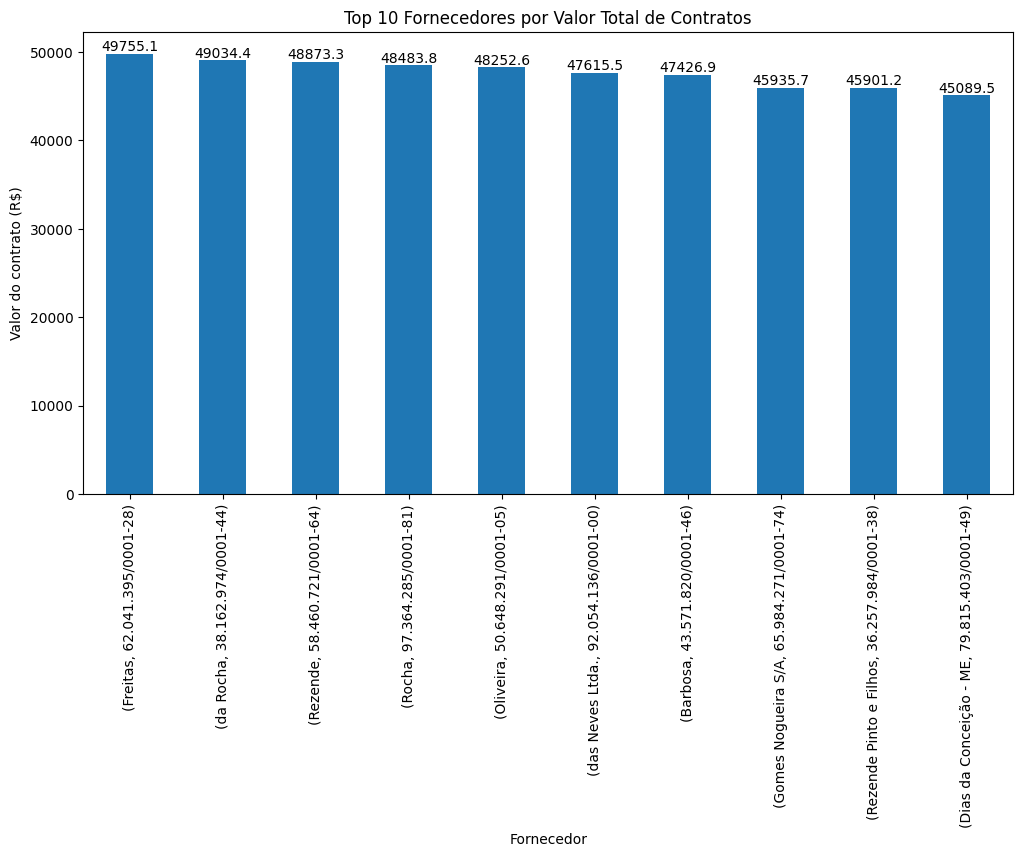

In [12]:
# Agrupe os dados por fornecedor e some o valor total dos contratos
fornecedores = dados_contrato.groupby(['Nome da empresa ou fornecedor contratado', 'CNPJ da empresa ou fornecedor contratado'])['Valor do contrato'].sum()
fornecedores = fornecedores.sort_values(ascending=False).head(10)  # Pegue os 10 principais fornecedores

# Crie o gráfico de barras
plt.figure(figsize=(12, 6))
ax = fornecedores.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Fornecedores por Valor Total de Contratos')
plt.xlabel('Fornecedor')
plt.ylabel('Valor do contrato (R$)')
plt.show()

##2 - Quais regiões receberam mais verbas ?

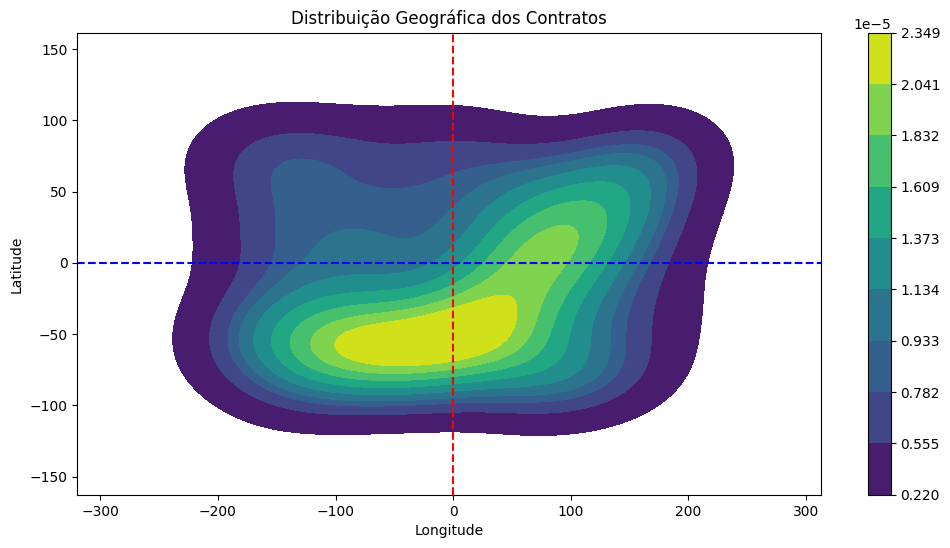

In [13]:
# Crie um mapa de calor com base nas coordenadas geográficas
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dados_contrato, x='Longitude', y='Latitude', fill=True, cmap='viridis', cbar=True)
plt.axvline(x=0, color='red', linestyle='--', label='Linha Vertical')
plt.axhline(y=0, color='blue', linestyle='--', label='Linha Horizontal')
plt.title('Distribuição Geográfica dos Contratos')
plt.show()

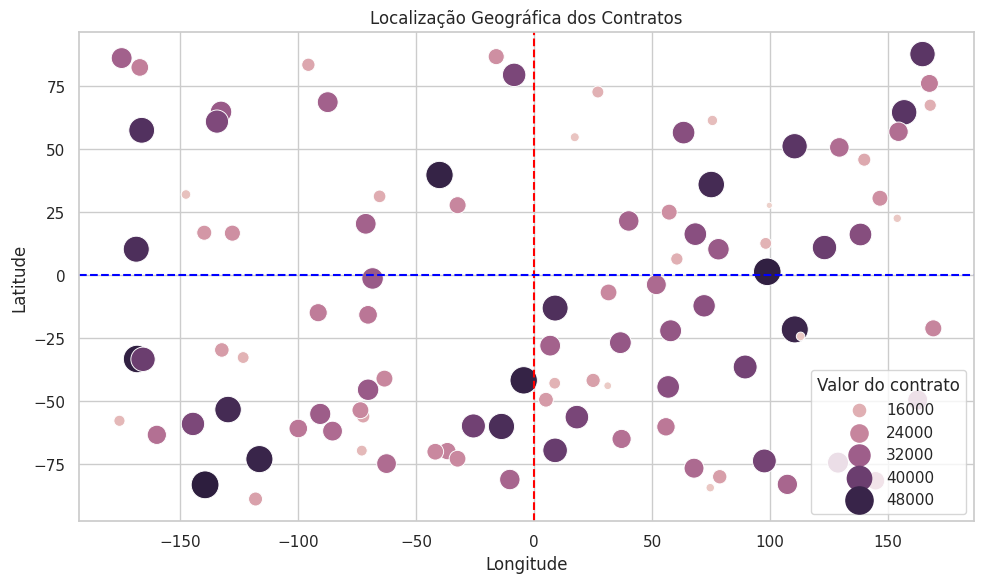

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=dados_contrato, x='Longitude', y='Latitude', size='Valor do contrato', hue='Valor do contrato', sizes=(20, 400))
plt.axvline(x=0, color='red',linestyle='--',label='Linha Vertical')
plt.axhline(y=0, color='blue',linestyle='--',label='Linha Horizontal')
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

Somatório dos valores dos contratos do quadrante 1 = R$ 688156.17
Somatório dos valores dos contratos do quadrante 2 = R$ 498169.34
Somatório dos valores dos contratos do quadrante 3 = R$ 803375.3200000001
Somatório dos valores dos contratos do quadrante 4 = R$ 913734.1499999999


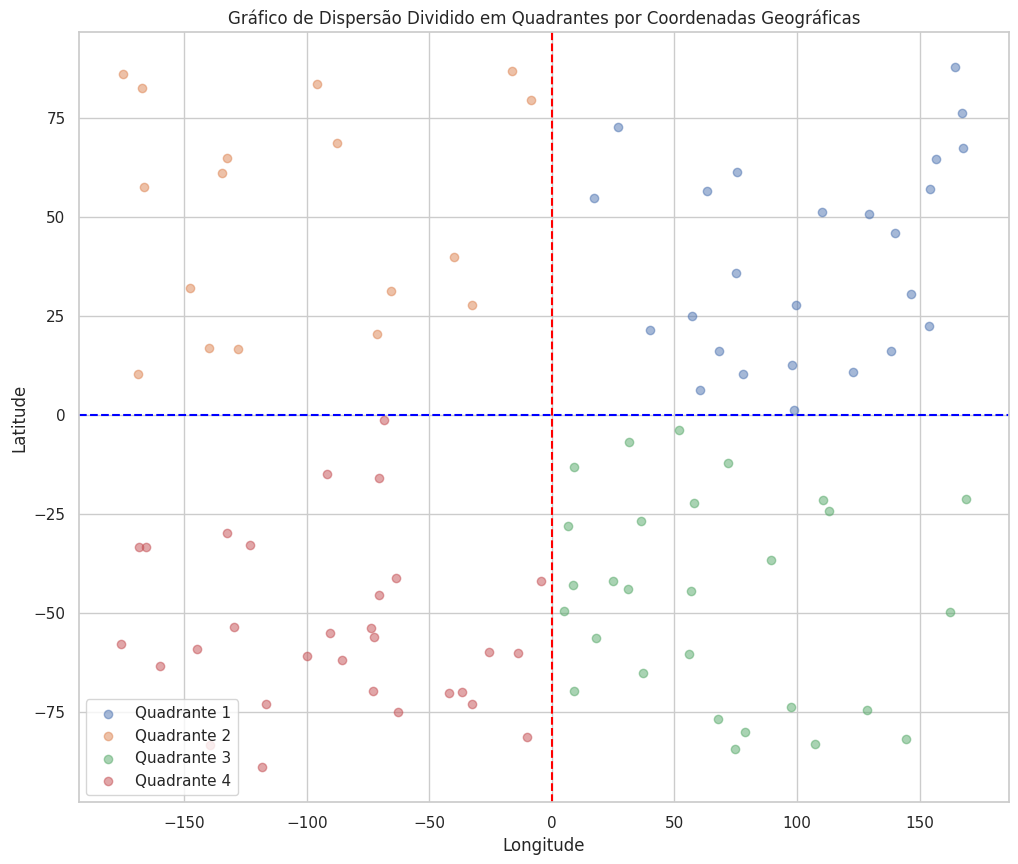

In [15]:
# Defina os limites para os quadrantes com base nas coordenadas geográficas
limite_lat_norte = 0
limite_lat_sul = 0
limite_lon_leste = 0
limite_lon_oeste = 0

# Divida os dados em quatro grupos com base nas coordenadas geográficas
quadrante1 = dados_contrato[(dados_contrato['Latitude'] >= limite_lat_norte) & (dados_contrato['Longitude'] >= limite_lon_leste)]
quadrante2 = dados_contrato[(dados_contrato['Latitude'] >= limite_lat_norte) & (dados_contrato['Longitude'] < limite_lon_leste)]
quadrante3 = dados_contrato[(dados_contrato['Latitude'] < limite_lat_sul) & (dados_contrato['Longitude'] >= limite_lon_leste)]
quadrante4 = dados_contrato[(dados_contrato['Latitude'] < limite_lat_sul) & (dados_contrato['Longitude'] < limite_lon_leste)]

sum_quad1 = quadrante1['Valor do contrato'].sum()
sum_quad2 = quadrante2['Valor do contrato'].sum()
sum_quad3 = quadrante3['Valor do contrato'].sum()
sum_quad4 = quadrante4['Valor do contrato'].sum()

print(f'Somatório dos valores dos contratos do quadrante 1 = R$ {sum_quad1}')
print(f'Somatório dos valores dos contratos do quadrante 2 = R$ {sum_quad2}')
print(f'Somatório dos valores dos contratos do quadrante 3 = R$ {sum_quad3}')
print(f'Somatório dos valores dos contratos do quadrante 4 = R$ {sum_quad4}')

# Crie um gráfico de dispersão dividido em quadrantes
plt.figure(figsize=(12, 10))

plt.scatter(quadrante1['Longitude'], quadrante1['Latitude'], label='Quadrante 1', alpha=0.5)
plt.scatter(quadrante2['Longitude'], quadrante2['Latitude'], label='Quadrante 2', alpha=0.5)
plt.scatter(quadrante3['Longitude'], quadrante3['Latitude'], label='Quadrante 3', alpha=0.5)
plt.scatter(quadrante4['Longitude'], quadrante4['Latitude'], label='Quadrante 4', alpha=0.5)

plt.title('Gráfico de Dispersão Dividido em Quadrantes por Coordenadas Geográficas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.axvline(x=0, color='red', linestyle='--')
plt.axhline(y=0, color='blue', linestyle='--')

plt.legend()
plt.show()

## 3 - Quanto falta para pagar de cada contrato?

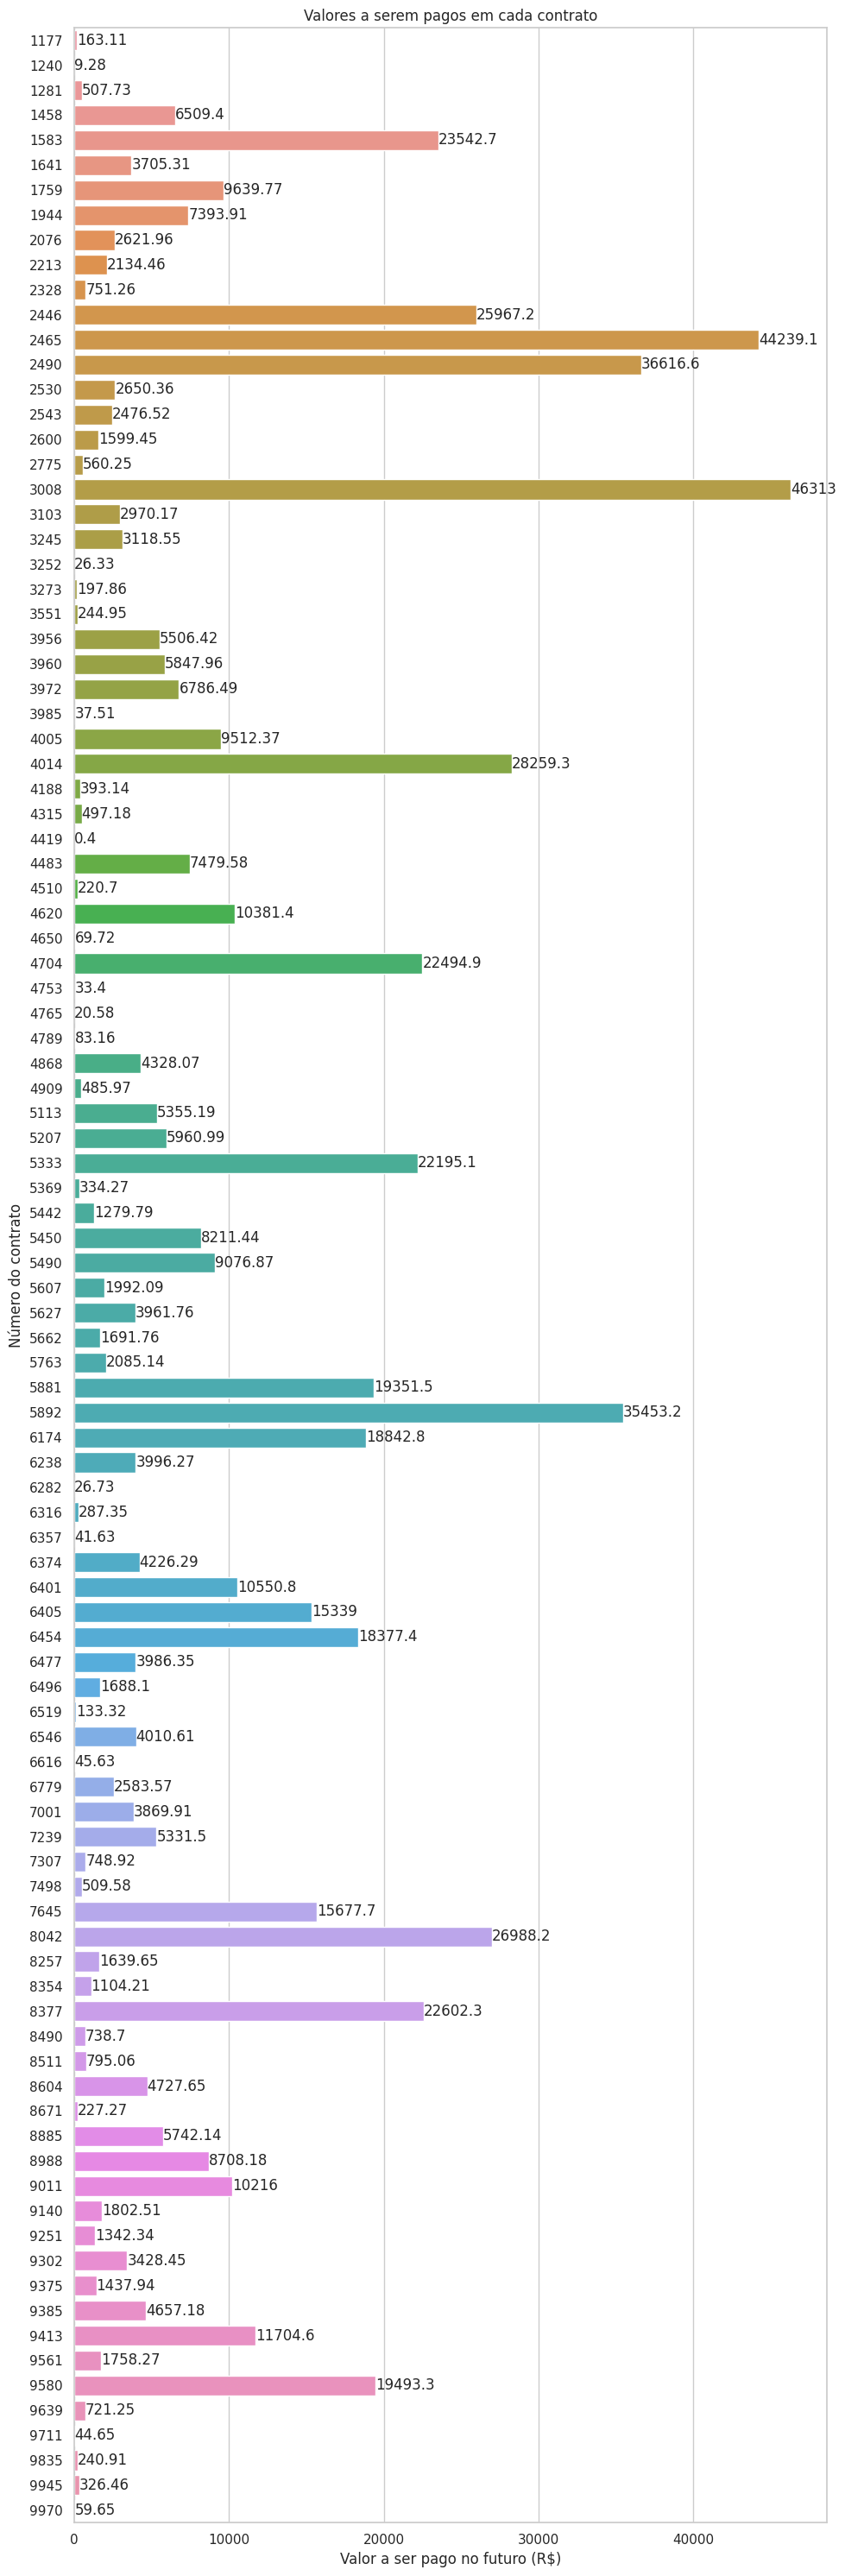

In [16]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')
ax = sns.barplot(data=dados_contrato, orient='h', x="Valor a ser pago no futuro", y="Número do contrato")
ax.bar_label(ax.containers[0])
plt.title('Valores a serem pagos em cada contrato')
plt.xlabel('Valor a ser pago no futuro (R$)')
plt.tight_layout()

## 4 - Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?

Fizemos a inclusão da coluna cnpj_fornecedor utilizando a função fake.cnpj(). Ela pode ser utilizada para consulta a base de dados da Receita Federal, por exemplo para verificar se o CNPJ é de uma empresa real e regularizada junto ao governo. Além disso, podemos utilizar o CNPJ para consultar os CPFs dos sócios da empresa fornecedora, verificando se algum sócio é funcionário do orgão público, evitando assim o conflito de interesses ou uma contratação fraudulenta com informações privilegiadas.

## 5 - Visualização da distribuição da duração dos contratos

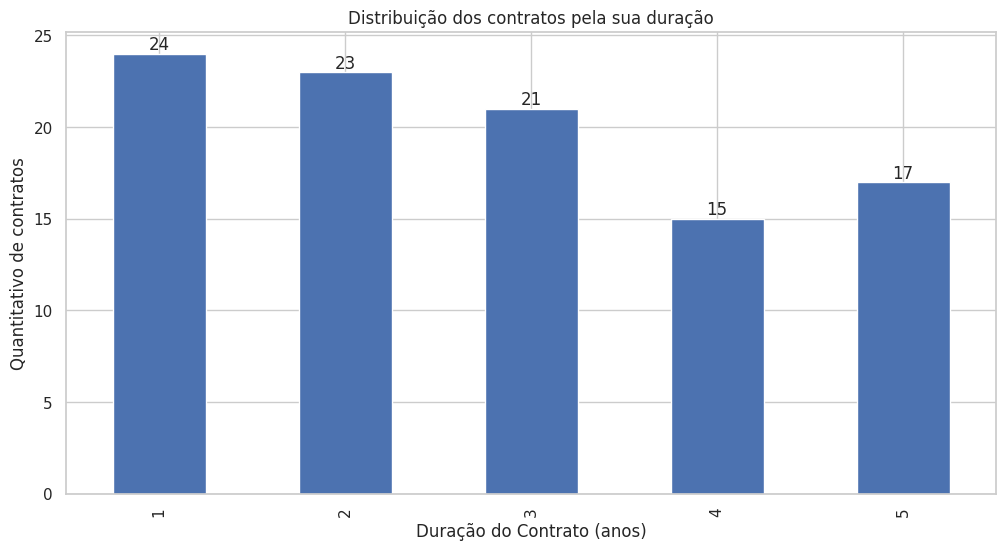

In [17]:
# Agrupe os dados por duração dos contratos e conte a quantidade de contratos
tempo_contrato = dados_contrato.groupby('Duração do contrato')['Número do contrato'].count()

# Crie o gráfico de barras
plt.figure(figsize=(12, 6))
ax = tempo_contrato.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Distribuição dos contratos pela sua duração')
plt.xlabel('Duração do Contrato (anos)')
plt.ylabel('Quantitativo de contratos')
plt.show()

## 6 - Fazer uma análise com regressão linear sobre verbas

alpha = 2050.9827571820497
betas = [0.69373349]


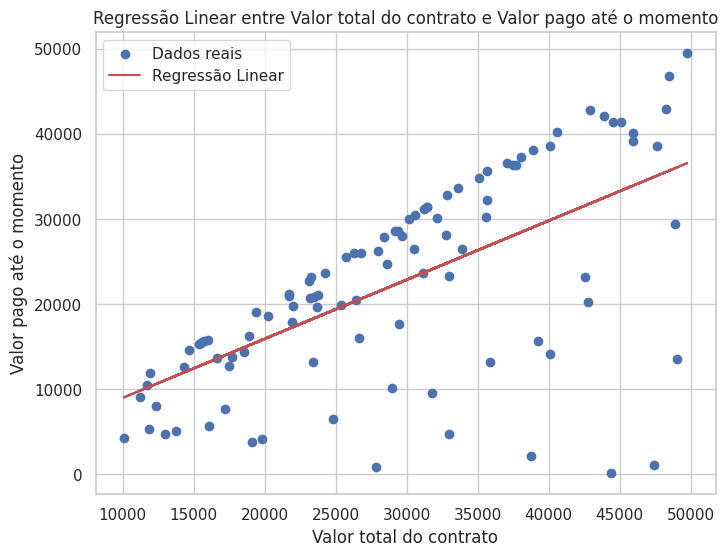

In [25]:
from sklearn.linear_model import LinearRegression

# Defina as variáveis dependentes (y) e independentes (X)
X = dados_contrato[['Valor do contrato']]
y = dados_contrato['Valor pago até o momento']

# Crie um modelo de regressão linear
lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

# Realize a previsão
y_pred = model.predict(X)

# Plote os resultados da regressão
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='b', label='Dados reais')
plt.plot(X, y_pred, c='r', label='Regressão Linear')
plt.title('Regressão Linear entre Valor total do contrato e Valor pago até o momento')
plt.xlabel('Valor total do contrato')
plt.ylabel('Valor pago até o momento')
plt.legend()
plt.show()

alpha = -2050.9827571820542
betas = [0.30626651]


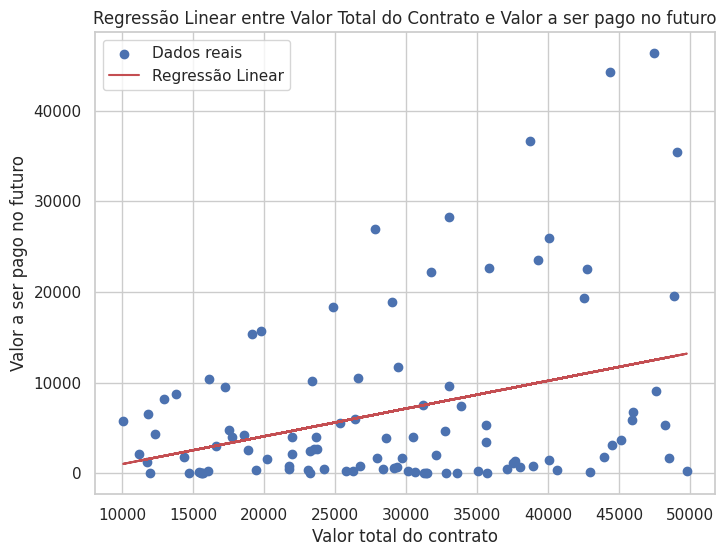

In [26]:
from sklearn.linear_model import LinearRegression

# Defina as variáveis dependentes (y) e independentes (X)
X = dados_contrato[['Valor do contrato']]
y = dados_contrato['Valor a ser pago no futuro']

# Crie um modelo de regressão linear
lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

# Realize a previsão
y_pred = model.predict(X)

# Plote os resultados da regressão
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='b', label='Dados reais')
plt.plot(X, y_pred, c='r', label='Regressão Linear')
plt.title('Regressão Linear entre Valor Total do Contrato e Valor a ser pago no futuro')
plt.xlabel('Valor total do contrato')
plt.ylabel('Valor a ser pago no futuro')
plt.legend()
plt.show()

## Outras análises gráficas realizadas

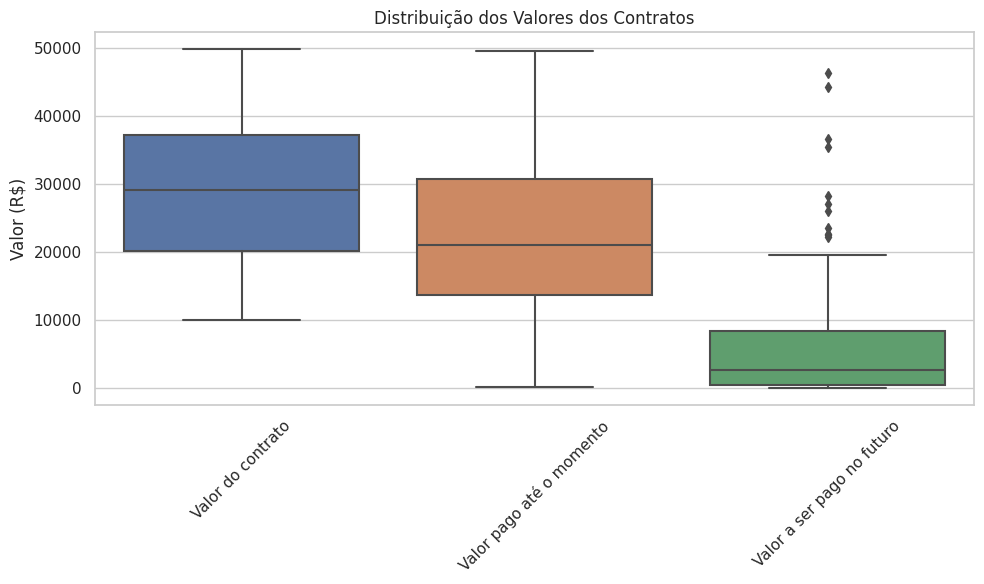

In [22]:
# Visualização dos valores dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']])
plt.title('Distribuição dos Valores dos Contratos')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

**Visualização da localização geográfica dos contratos**

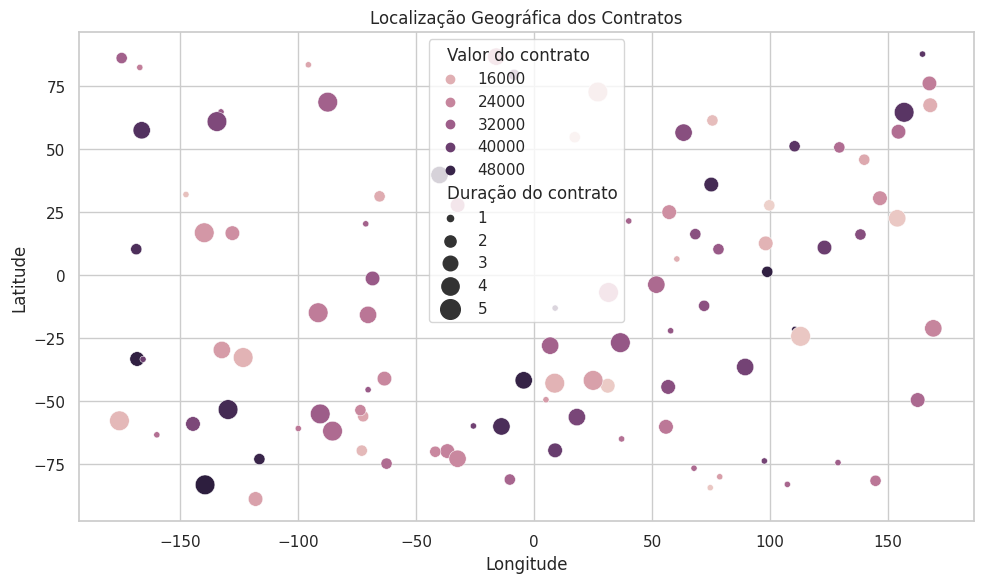

In [23]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=dados_contrato, x='Longitude', y='Latitude', hue='Valor do contrato', size='Duração do contrato', sizes=(20, 200))
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

**Exemplo de análise adicional: Correlação entre variáveis**

<ipython-input-24-d62044239887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_contrato.corr()


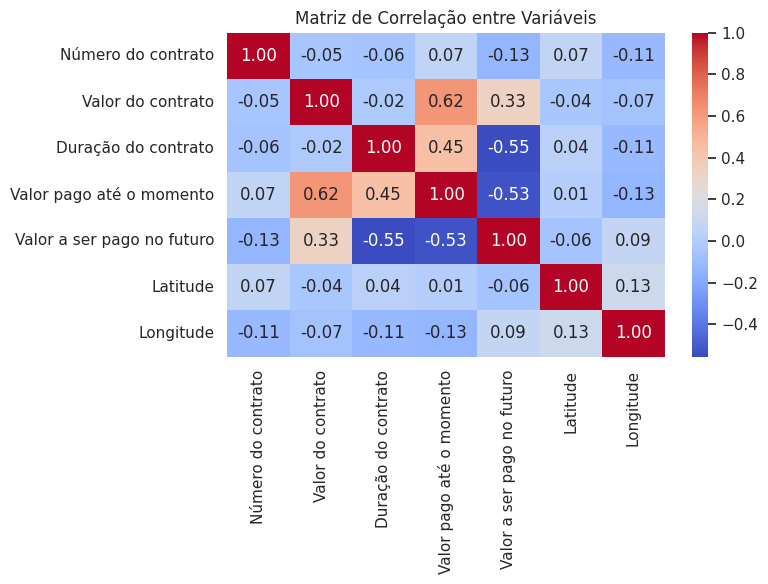

In [24]:
correlacao = dados_contrato.corr()
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.heatmap(data=correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()

plt.show()